# **Dominos - Predictive Purchase Order System**

## **Objective**

  * To develop a predictive model that accurately forecasts pizza sales, allowing Domino’s to generate optimized purchase orders for ingredients.
  
  * Ensure efficient inventory management by minimizing waste, reducing costs, and maintaining stock availability to meet customer demand.

## **Overview**

  * This project involves building a predictive system for Domino's Pizza to optimize the process of ordering ingredients.
  
  * The goal is to forecast pizza sales and create a purchase order based on these predictions.
  
  * The predictive system helps Domino's maintain adequate stock levels, reduce waste, and streamline operations.

## **Why Choose This Project?**

  * **Business Need**: Domino’s faces challenges in managing ingredient inventory, leading to stockouts or wastage. This project aims to solve the issue by predicting future demand.
  
  * **Impact on Operations**: Accurate forecasting helps streamline the supply chain and reduce costs.

  * **Skills Application**: It provides an opportunity to apply data science, time series analysis, and machine learning to solve real-world problems.

## **Technical Approach**

1. **Data Preparation**

    * Gathered historical pizza sales data.
    * Grouped data by order_date and pizza_name to compute total sales quantity.
    * Handled missing data using the fillna() method.

2. **Model Selection**

    * ARIMA Model: Used for time series data without seasonal components.
    * SARIMA Model: Handled data with clear seasonal patterns.
    * Prophet Model: A flexible model that handles holidays, trends, and seasonal data.

3. **Model Evaluation**

    * Split data into training and testing sets.
    * Compared forecast accuracy using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sales = pd.read_excel('Pizza_sale.xlsx')
df_ing = pd.read_excel('Pizza_ingredients.xlsx')

In [3]:
df_sales.to_csv('pizza_sales.csv', index=False)
df_ing.to_csv('Pizza_ingredients.csv', index=False)

In [4]:
pizza_df = pd.read_csv('pizza_sales.csv')
ingred_df = pd.read_csv('Pizza_ingredients.csv')

# **Data Cleaning**

In [5]:
pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [8]:
pizza_df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [9]:
pizza_df.dropna(inplace=True)

In [10]:
pizza_df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [11]:
pizza_df.duplicated().sum()

0

In [12]:
pizza_df.shape

(48554, 12)

In [13]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):  #This function attempts to convert a date string (date) into a datetime object using two different date formats ('%d-%m-%Y' and '%d/%m/%Y')
    try:
      return pd.to_datetime(date, format=fmt) # andas.to_datetime():This function is used to convert a string into a datetime object
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [14]:
import pandas as pd

def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d %H:%M:%S'): # Added '%Y-%m-%d %H:%M:%S' format
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

pizza_df['order_date'] = pizza_df['order_date'].apply(parse_dates) # This method is used to apply a function (parse_dates) to each element in a Pandas DataFrame column

Use Case:
  
  * This approach is useful when dealing with datasets that may have inconsistent date formats, allowing you to standardize them into a usable datetime format for analysis
  
  * When working with time-series data or data that includes dates (such as sales data, event logs, etc.), dates must be converted from string format into a datetime format so they can be used in further analysis (e.g., calculating the time between events, filtering by date, or plotting time-based trends).
  
  * This conversion is essential for sorting, filtering, and performing date-specific operations on the data, like grouping by year or month, extracting weekday information, or calculating time intervals.

Practical Usage:

  * Sales Analysis
  * Event Logs
  * Trend Analysis

In [15]:
pizza_df['order_date'].head()

,order_date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


In [16]:
def detect_outliers_iqr(df, column):
    """Detects outliers using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [17]:
def remove_outliers_iqr(df, column):
    """Removes outliers using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

In [18]:
# Example usage (replace 'quantity' with your relevant column):
outliers_quantity = detect_outliers_iqr(pizza_df, 'quantity')
print("Outliers in 'quantity':\n", outliers_quantity)

Outliers in 'quantity':
        pizza_id  order_id   pizza_name_id  quantity order_date order_time  \
48           49        17  mediterraneo_m         2 2015-01-01   13:53:00   
183         184        78    spicy_ital_l         3 2015-02-01   12:28:14   
211         212        91       bbq_ckn_l         2 2015-02-01   15:14:43   
222         223        92     the_greek_m         2 2015-02-01   15:17:02   
245         246       105      hawaiian_s         2 2015-02-01   18:12:01   
...         ...       ...             ...       ...        ...        ...   
48461     48462     21285    spin_pesto_s         2 2015-12-31   12:41:37   
48466     48467     21288   classic_dlx_m         3 2015-12-31   13:04:18   
48495     48496     21298      big_meat_s         2 2015-12-31   15:35:37   
48575     48576     21331       bbq_ckn_l         2 2015-12-31   19:05:04   
48601     48602     21343    spicy_ital_l         2 2015-12-31   20:27:23   

       unit_price  total_price pizza_size pizza_ca

In [19]:
pizza_df_no_outliers = remove_outliers_iqr(pizza_df, 'quantity')
print("\nDataFrame with outliers removed in 'quantity':\n", pizza_df_no_outliers)


DataFrame with outliers removed in 'quantity':
        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_s

In [22]:
if 'unit_price' not in pizza_df.columns:
    print("Error: 'unit_price' column not found. Please check your column names.")
else:
    outliers_unit_price = detect_outliers_iqr(pizza_df, 'unit_price')
    print("Outliers in 'unit_price':\n", outliers_unit_price)

    pizza_df_no_outliers_unit_price = remove_outliers_iqr(pizza_df, 'unit_price')
    print("\nDataFrame with outliers removed in 'unit_price':\n", pizza_df_no_outliers_unit_price)

Outliers in 'unit_price':
        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
3447       3448      1528  the_greek_xxl         1 2015-01-26   15:24:38   
3563       3564      1581  the_greek_xxl         1 2015-01-27   16:28:38   
5901       5902      2614  the_greek_xxl         1 2015-02-13   13:52:26   
6365       6366      2813  the_greek_xxl         1 2015-02-16   18:15:02   
7490       7491      3297  the_greek_xxl         1 2015-02-25   12:57:10   
9844       9845      4307  the_greek_xxl         1 2015-03-14   13:19:35   
10282     10283      4498  the_greek_xxl         1 2015-03-17   16:22:45   
10875     10876      4761  the_greek_xxl         1 2015-03-21   18:10:58   
13511     13512      5927  the_greek_xxl         1 2015-10-04   14:02:08   
13779     13780      6038  the_greek_xxl         1 2015-12-04   11:51:07   
14029     14030      6150  the_greek_xxl         1 2015-04-13   21:15:17   
15330     15331      6724  the_greek_xxl         1 2015-04-23

# **Exploratory Data Analysis (EDA)**

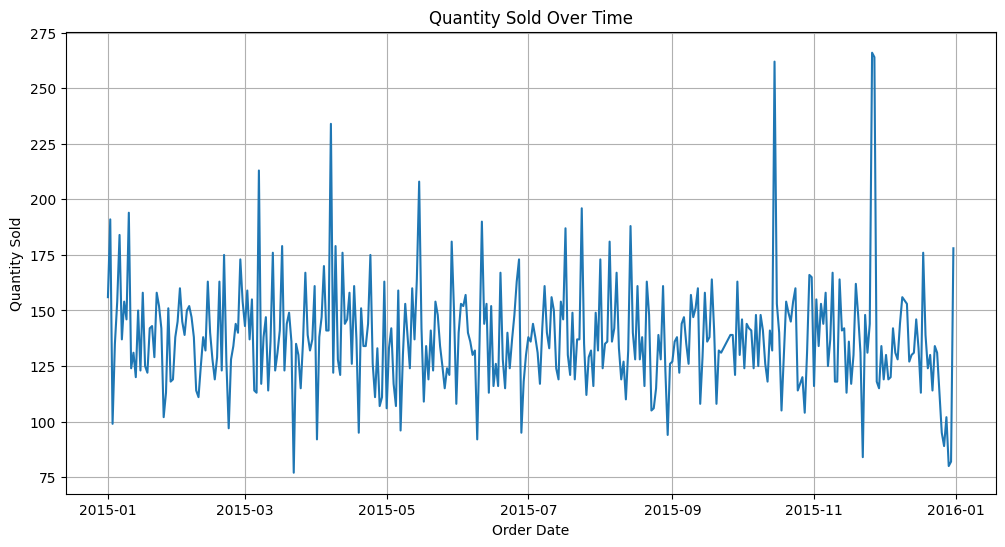

In [23]:
# Group by order date and sum the quantity
quantity_over_time = pizza_df.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

In [24]:
# Extract year and month from order_date
pizza_df['year'] = pizza_df['order_date'].dt.year
pizza_df['month'] = pizza_df['order_date'].dt.month

In [25]:
# Group by year and month, and sum the quantity
monthly_sales = pizza_df.groupby(['year', 'month'])['quantity'].sum()

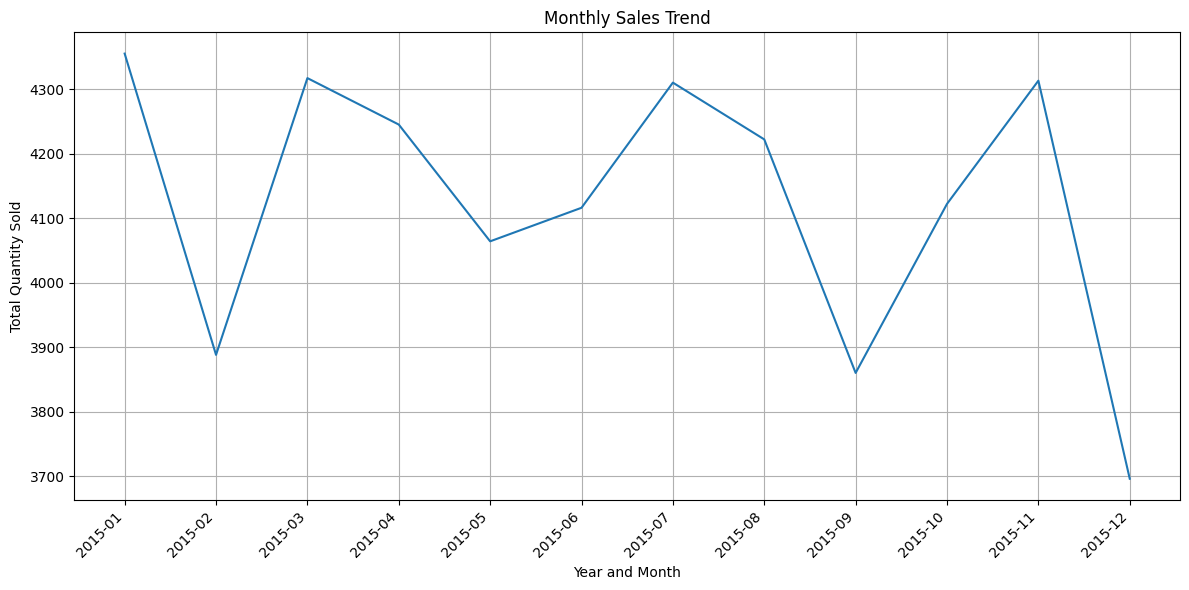

In [26]:
# Create a line plot to visualize the sales trend over time
plt.figure(figsize=(12, 6))
# Convert the MultiIndex to a list of strings for plotting
x_values = [f"{year}-{month:02}" for year, month in monthly_sales.index]
plt.plot(x_values, monthly_sales.values)
plt.xlabel('Year and Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [27]:
# Analyze Seasonality
# Group by month and calculate the average quantity sold
monthly_avg_sales = pizza_df.groupby('month')['quantity'].mean()

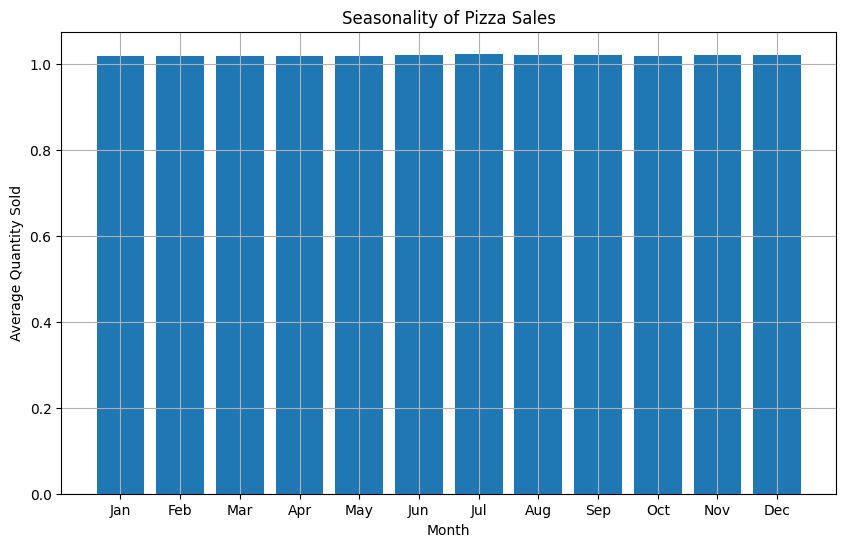

In [28]:
# Create a bar plot to visualize the seasonality
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_sales.index, monthly_avg_sales.values)
plt.xlabel('Month')
plt.ylabel('Average Quantity Sold')
plt.title('Seasonality of Pizza Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [29]:
# Analyze sales patterns
# Group by day of the week and calculate the average quantity sold
pizza_df['day_of_week'] = pizza_df['order_date'].dt.dayofweek  # Monday=0, Sunday=6
daily_avg_sales = pizza_df.groupby('day_of_week')['quantity'].mean()

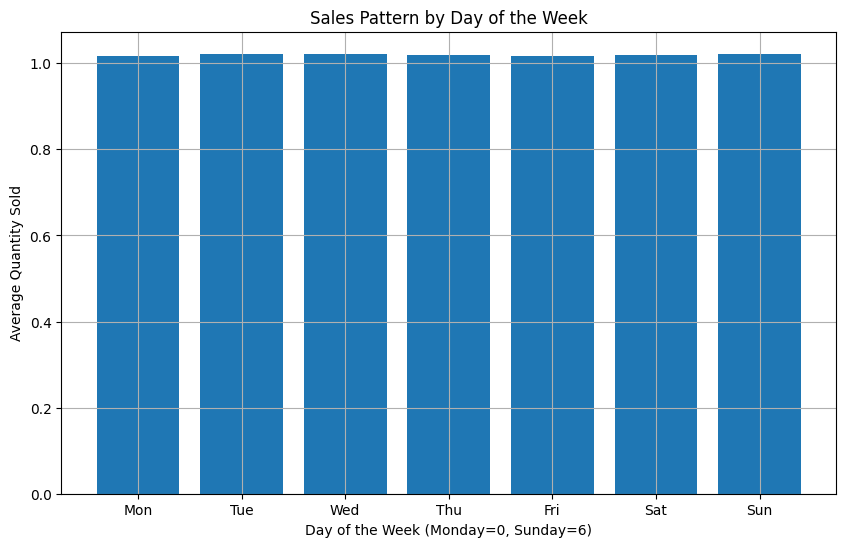

In [30]:
# Create a bar plot to visualize the sales patterns by day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_avg_sales.index, daily_avg_sales.values)
plt.xlabel('Day of the Week (Monday=0, Sunday=6)')
plt.ylabel('Average Quantity Sold')
plt.title('Sales Pattern by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

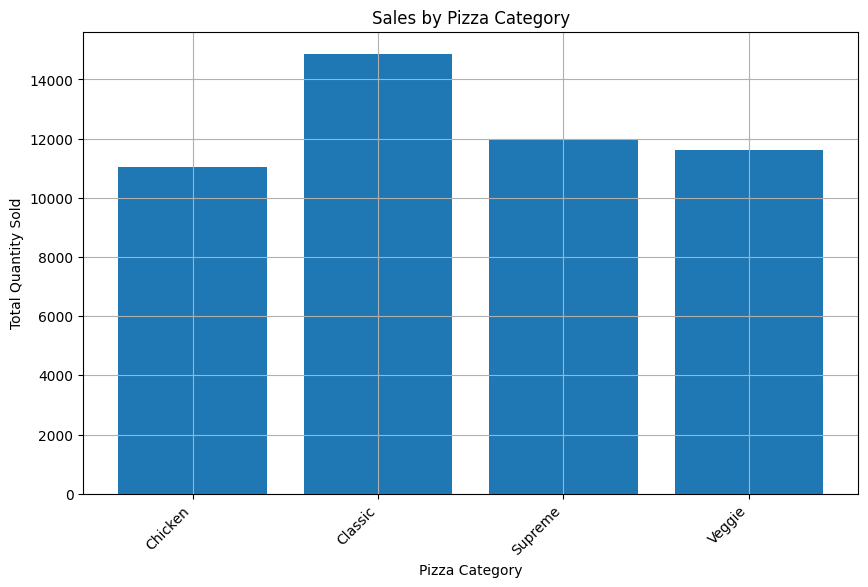

In [31]:
# Analyze sales trends by pizza category
category_sales = pizza_df.groupby('pizza_category')['quantity'].sum()
plt.figure(figsize=(10, 6))
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Pizza Category')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

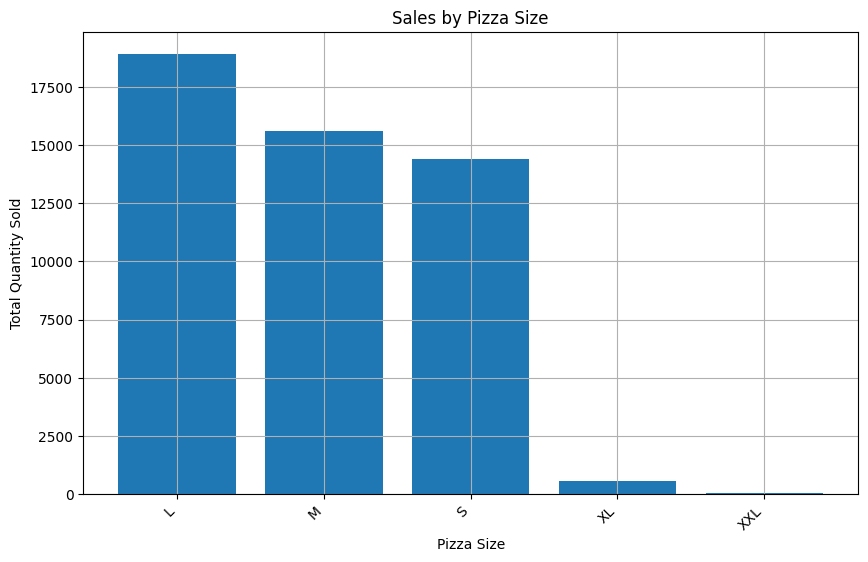

In [32]:
# Analyze sales trends by pizza size
size_sales = pizza_df.groupby('pizza_size')['quantity'].sum()
plt.figure(figsize=(10, 6))
plt.bar(size_sales.index, size_sales.values)
plt.xlabel('Pizza Size')
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Pizza Size')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

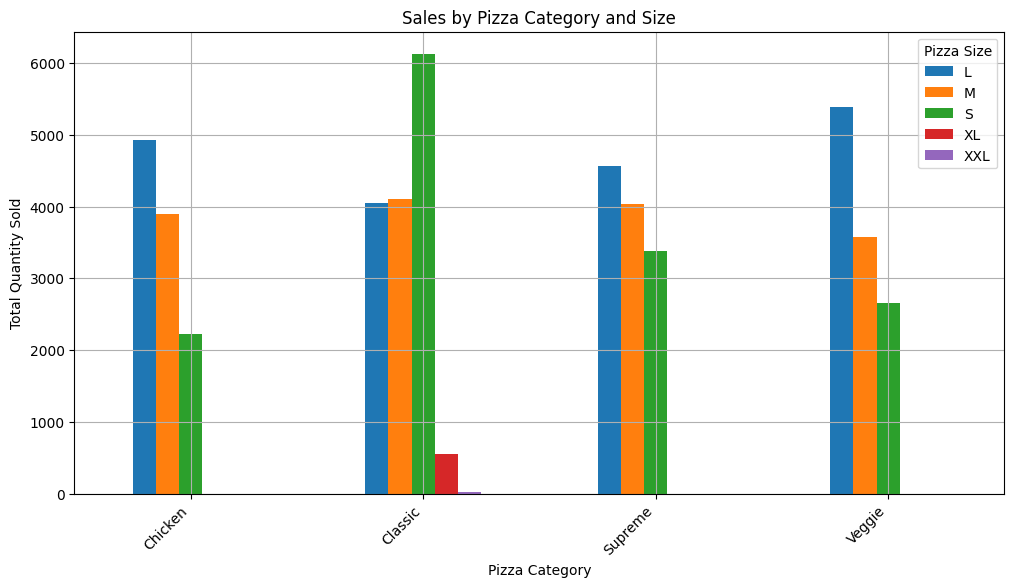

In [33]:
# Analyze sales trends by pizza category and size
category_size_sales = pizza_df.groupby(['pizza_category', 'pizza_size'])['quantity'].sum().unstack()
category_size_sales.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Pizza Category and Size')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Size')
plt.show()

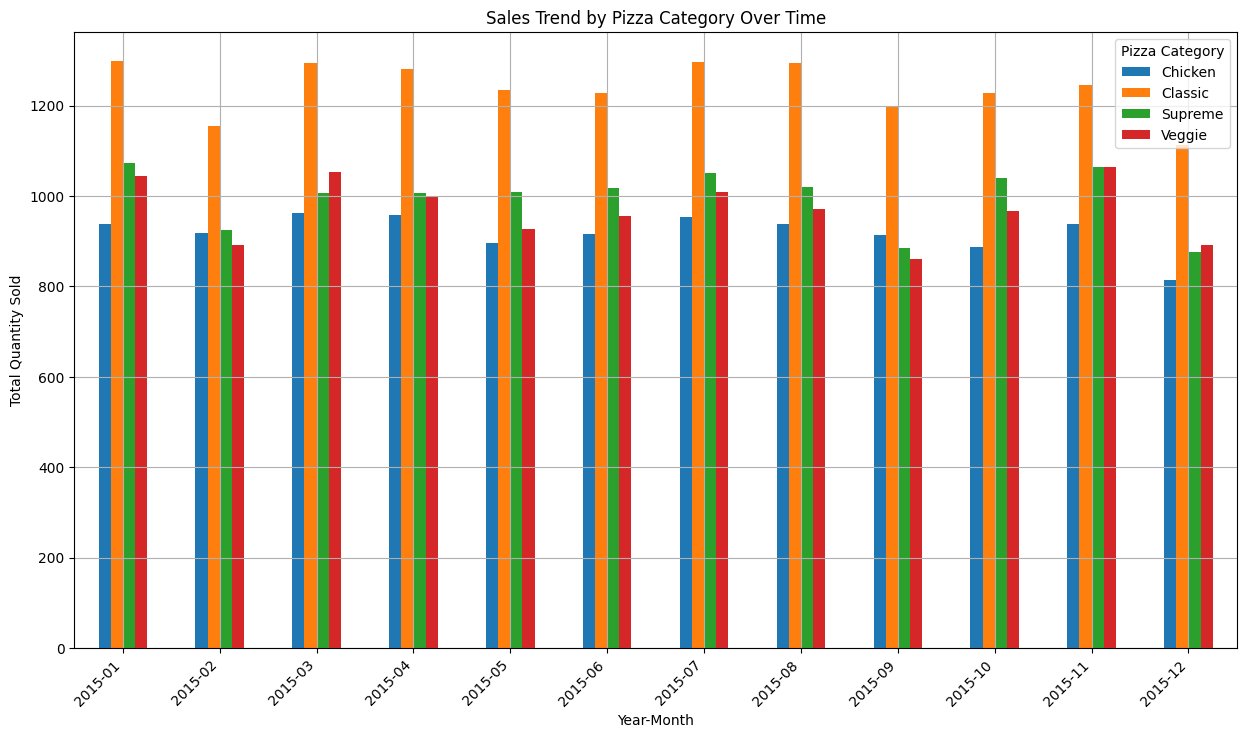

In [34]:
# Analyze sales trends by pizza category over time using bar plot
pizza_df['order_year_month'] = pizza_df['order_date'].dt.strftime('%Y-%m')
category_monthly_sales = pizza_df.groupby(['order_year_month', 'pizza_category'])['quantity'].sum().unstack()

category_monthly_sales.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend by Pizza Category Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Category')
plt.show()

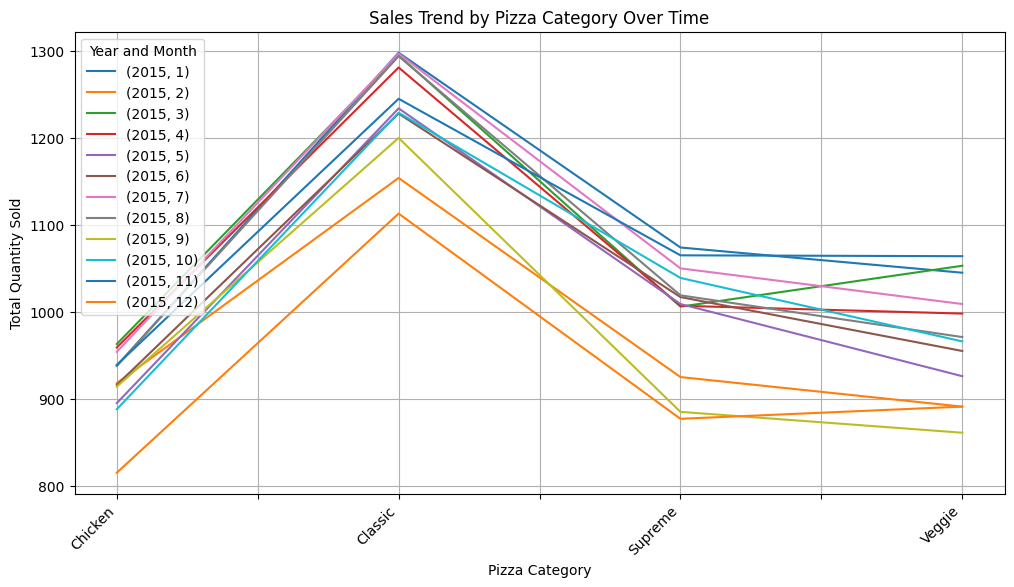

In [35]:
# Analyze sales trends by pizza category over time
category_time_sales = pizza_df.groupby(['pizza_category', 'year', 'month'])['quantity'].sum().unstack(['year', 'month'])
category_time_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend by Pizza Category Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Year and Month')
plt.show()

In [36]:
# Extract the hour from the order_date
pizza_df['order_hour'] = pizza_df['order_date'].dt.hour

In [37]:
# Group by order hour and sum the quantity
hourly_sales = pizza_df.groupby('order_hour')['quantity'].sum()

In [38]:
# Find the peak hours with the highest sales
peak_hours = hourly_sales.sort_values(ascending=False).head(5)  # Top 5 peak hours

In [39]:
print("Peak Hours of Sales:")
print(peak_hours)

Peak Hours of Sales:
order_hour
0    49508
Name: quantity, dtype: int64


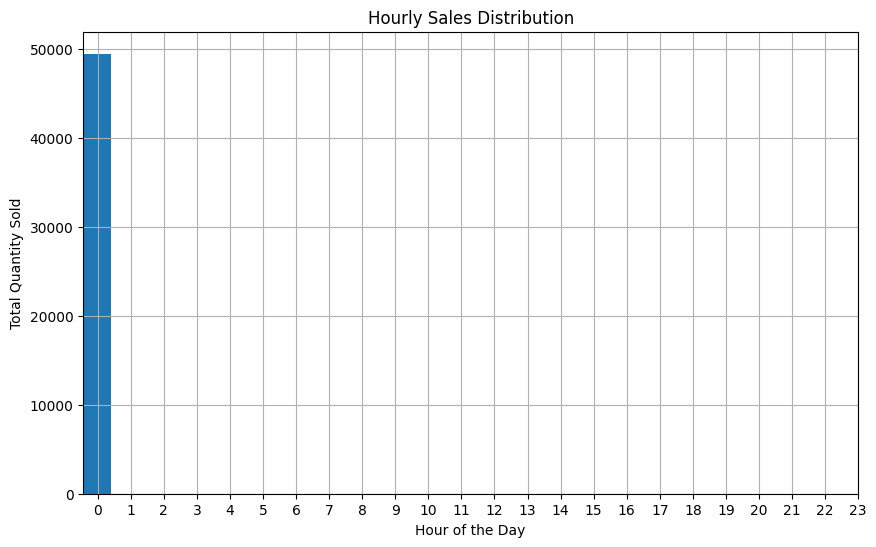

In [40]:
# Visualize the peak hours
plt.figure(figsize=(10, 6))
plt.bar(hourly_sales.index, hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.title('Hourly Sales Distribution')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

Business Insight:

  * This can be used to make data-driven decisions, such as identifying peak sales periods, planning inventory, or preparing for high-demand times.

# **Autocorrelation and partial Autocorrelation :**

Autocorrelation Function (ACF):
  * measures the correlation of the time series with its own past values (lags). It helps to understand if and how past values influence future values.

Partial Autocorrelation (PACF):

  * Partial Autocorrelation Function (PACF) shows the correlation between the time series and its lags after removing the influence of the intermediate lags. This can be useful to identify direct relationships between current and past values without the influence of other lags.

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

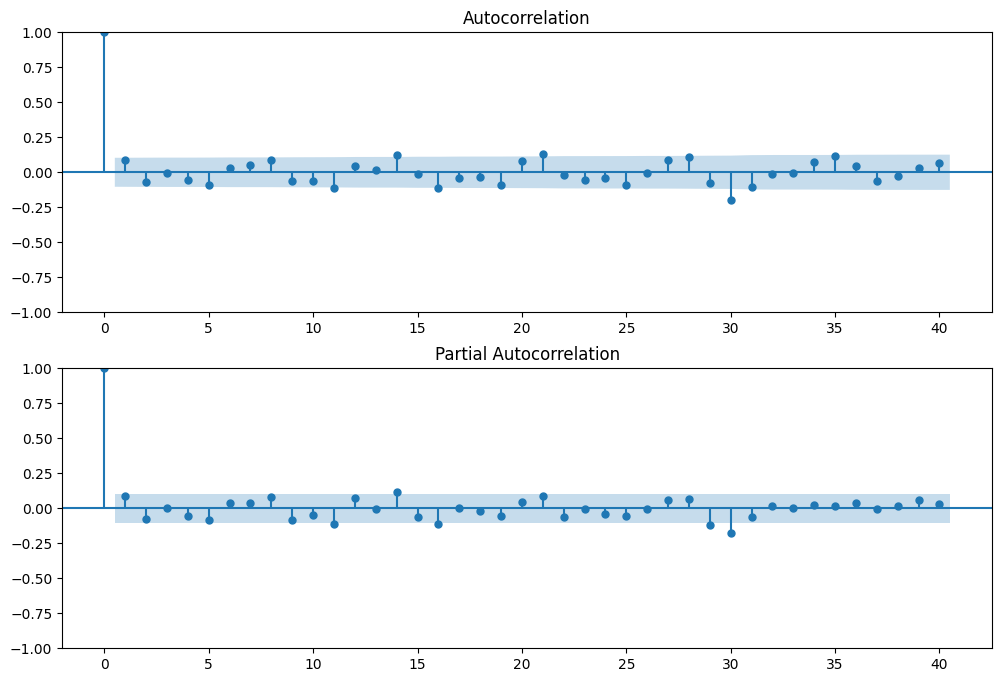

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(quantity_over_time, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(quantity_over_time, lags=40, ax=ax2)

Purpose:

  * This part of the code is used to analyze autocorrelation and partial autocorrelation in the time series data (quantity_over_time), which helps determine how the current values are related to past values.

Use Case:
  * Autocorrelation Purpose: Autocorrelation is used to understand if there is any periodicity or repeated patterns in the time series. For example, are sales this week related to sales last week? Is there any seasonality?

  * Partial Autocorrelation Purpose: PACF helps to find the order of an autoregressive (AR) model in time series analysis. In simpler terms, it helps identify how many past observations (lags) directly influence the current observation.

  * Business Insight: These plots help identify the degree of dependency in the sales data over time, which is crucial for building time-series forecasting models. It can help answer questions like:
    * Do sales from the previous day strongly influence today’s sales?
    * Is there a seasonal pattern, such as weekly or monthly trends?
    * How many past days should we consider when predicting future sales?


Practical Purpose:

  * Forecasting Preparation: The autocorrelation and partial autocorrelation plots are crucial for preparing the data for time-series forecasting models like ARIMA (AutoRegressive Integrated Moving Average). These plots help determine the number of past observations (lags) that are needed for accurate predictions.

**Testing for Stationary :**

In [43]:
from statsmodels.tsa.stattools import adfuller

  * A stationary time series is one whose statistical properties such as mean, variance, and autocorrelation are constant over time. This is important because many time series forecasting methods (like ARIMA) require the data to be stationary.
  * If the time series is non-stationary, it means that its properties change over time, often due to trends or seasonality. In such cases, transformations like differencing or log transformations might be applied to achieve stationarity

Augmented Dickey-Fuller (ADF) Test

  * The ADF test is a statistical test used to determine whether a time series is stationary or non-stationary.

In [44]:
# H0: it is not stationary
# H1: it is stationary

def adf_test(sales):
  result = adfuller(sales)
  print('ADF Statistic: %f' % result[0])  #  If the ADF statistic is significantly negative, it suggests the time series is stationary
  print('p-value: %f' % result[1])  # p-value (typically less than 0.05) indicates that we can reject the null hypothesis, meaning the series is likely stationary
  print(f'# Lags used: {result[2]}')  # This tells you how many lag terms were used in the test to account for autocorrelation in the data
  print(f'No of observations used: {result[3]}')  # This tells you how many observations were used for the test, after adjusting for lags
  if result[1] <= 0.05:
    print('we reject the null hypothesis, The series is stationary')
  else:
    print('Not enough statistical evidence to reject null hypothesis, The series is not stationary')

In [45]:
adf_test(quantity_over_time)

ADF Statistic: -4.919389
p-value: 0.000032
# Lags used: 15
No of observations used: 342
we reject the null hypothesis, The series is stationary


Purpose of the Code

  * The primary purpose of this code is to determine if the time series (e.g., quantity sold over time) is stationary or not.

  * Stationarity Check: Time series forecasting models like ARIMA require the data to be stationary. The ADF test helps to confirm whether the series meets this requirement.

  * Model Selection: If the series is non-stationary, you may need to apply transformations (like differencing or detrending) to make the data stationary before building a predictive model.

  * Business Insight: If sales data (or any other time-series data) is stationary, it can suggest that historical sales patterns can be used more reliably for future predictions without worrying about trends. However, if the data is non-stationary, it suggests that the sales are changing over time, which may require more complex modeling techniques to handle.

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
eval_data = pizza_df.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)

Purpose:
  
  * The code is aggregating pizza sales data by order date and pizza name. This creates a time series for each pizza type, showing the total quantity of each pizza sold on each date.

.unstack(): This reshapes the grouped data so that each pizza name becomes a separate column, with the order_date as the row index. Now, each row represents a date, and each column represents a pizza type, showing the quantity of each pizza sold on that date

In [48]:
eval_data.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,12.0,9.0,3.0,7.0,15.0,3.0,2.0,13.0,5.0,6.0,...,6.0,5.0,3.0,9.0,9.0,5.0,3.0,4.0,8.0,1.0
2015-01-03,2.0,3.0,1.0,1.0,6.0,0.0,1.0,4.0,5.0,4.0,...,1.0,2.0,0.0,9.0,4.0,3.0,0.0,5.0,4.0,6.0
2015-01-04,2.0,3.0,0.0,2.0,3.0,3.0,2.0,8.0,7.0,6.0,...,4.0,8.0,6.0,10.0,4.0,4.0,6.0,1.0,3.0,5.0
2015-01-05,6.0,1.0,1.0,4.0,11.0,2.0,5.0,9.0,6.0,4.0,...,5.0,5.0,0.0,6.0,5.0,2.0,4.0,5.0,10.0,6.0


In [49]:
one_pizza = eval_data['The Barbecue Chicken Pizza']

Use Case:

  * This is useful for analyzing the sales trends of just one specific pizza type. For example, you may want to forecast future sales for only the Barbecue Chicken Pizza, or analyze its historical sales patterns.

# **Model Selection**

In [50]:
# split train and test
train = one_pizza[:-7]
test = one_pizza[-7:]

Purpose:
  * This part of the code is splitting the data into training and test sets for time-series forecasting. This is a common practice in machine learning and time-series analysis to evaluate model performance.

Use Case:
  
  * Training and Testing: By splitting the data, you can train a time-series forecasting model (like ARIMA or LSTM) on the majority of the data (train set) and then test the model’s accuracy by comparing its predictions with the actual sales from the test set. This is important to ensure the model generalizes well to unseen data

# **ARIMA Model:**

  * ARIMA is a popular model used for time series forecasting. The model is defined by three parameters: (p, d, q):

    * p (AutoRegressive term): Refers to the number of lag observations included in the model (the order of the autoregressive part).
    * d (Differencing): The number of times the raw observations are differenced to make the series stationary.
    * q (Moving Average term): Refers to the size of the moving average window (the order of the moving average part).

In [51]:
# Fit Arima model
ari_model = ARIMA(train, order=(1, 1, 0))
ari_result = ari_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [52]:
# forecast
ari_forecast = ari_result.get_forecast(steps=len(test))
ari_fore_values = ari_forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Use Case:
  * Once the model is trained, you can use it to forecast future values. In this case, the forecasted values correspond to the time period of the test set, allowing you to compare predictions with actual data

In [53]:
ari_predict = ari_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Use Case:
  * Dynamic forecasting is used to simulate how the model will perform when deployed to make real-time predictions

In [54]:
ari_predict.index = test.index

In [55]:
# concat test and ari_predict without changing the index of test, test is a pandas series

concatenated_series = pd.concat([test, ari_predict], axis=1)
concatenated_series.columns = ['Actual', 'Predicted']
concatenated_series

,Actual,Predicted
order_date,,
2015-12-24,4.0,5.084266
2015-12-26,5.0,5.503550
2015-12-27,4.0,5.311574
2015-12-28,2.0,5.399474
2015-12-29,4.0,5.359227
2015-12-30,6.0,5.377655
2015-12-31,10.0,5.369217


Concatenating:
  * This step combines the actual test values and the predicted values into a single dataframe so that they can be compared side by side

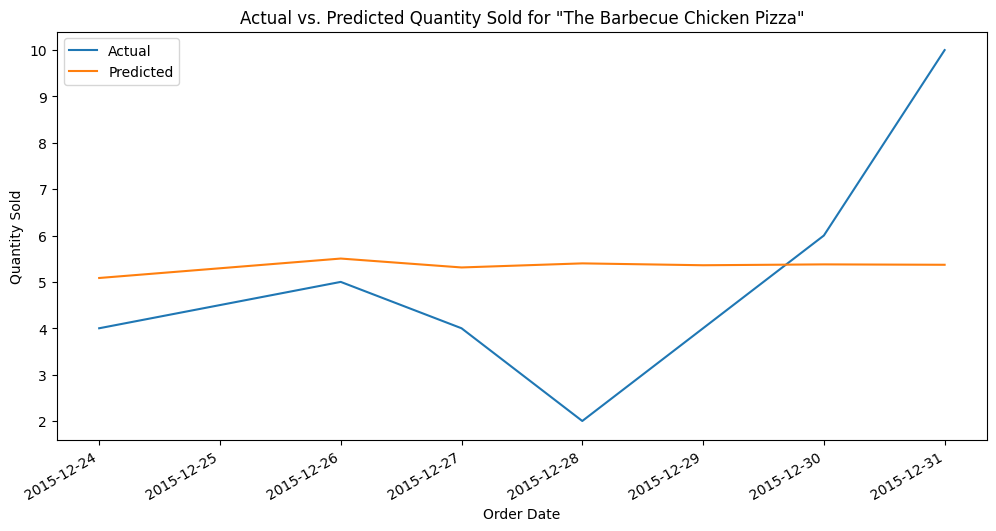

In [56]:
concatenated_series.plot(figsize=(12, 6))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold for "The Barbecue Chicken Pizza"')
plt.show()

In [57]:
# Evaluate the model
mae = mean_absolute_error(test, ari_fore_values)
mse = mean_squared_error(test, ari_fore_values)
rmse = np.sqrt(mse)

print(f'ARIMA MAE: {mae}')
print(f'ARIMA MSE: {mse}')
print(f'ARIMA RMSE: {rmse}')

ARIMA MAE: 1.8444598200710796
ARIMA MSE: 5.4835431682341005
ARIMA RMSE: 2.341696643084689


  * Mean Absolute Error (MAE): The average absolute difference between the actual and predicted values.

  * Mean Squared Error (MSE): The average of the squared differences between actual and predicted values.

  * Root Mean Squared Error (RMSE): The square root of MSE, providing error in the same unit as the data.

# **SARIMA Model**

  * SARIMAX Model: SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with Exogenous variables. It’s a more complex model than ARIMA, designed to handle seasonality (recurring patterns), as well as external influences (exogenous variables, though not used in this example)

In [58]:
# fit SARIMA model
sari_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sari_result = sari_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
# sarima forecast
sari_forecast = sari_result.get_forecast(steps=len(test))
sari_fore_values = sari_forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [60]:
# Evaluate Sarima
mae = mean_absolute_error(test, sari_fore_values)
mse = mean_squared_error(test, sari_fore_values)
rmse = np.sqrt(mse)

print(f'SARIMAX MAE: {mae}')
print(f'SARIMAX MSE: {mse}')
print(f'SARIMAX RMSE: {rmse}')

SARIMAX MAE: 2.4494962419985193
SARIMAX MSE: 7.643175436020916
SARIMAX RMSE: 2.7646293487592355


In [61]:
sari_predict = sari_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
sari_predict.index = test.index

In [63]:
sari_predict

,predicted_mean
order_date,
2015-12-24,7.519956
2015-12-26,6.311427
2015-12-27,5.876091
2015-12-28,6.495620
2015-12-29,6.131548
2015-12-30,6.517850
2015-12-31,6.706018


In [64]:
concatenated_sarima = pd.concat([test, sari_predict] , axis=1)
concatenated_sarima.columns = ['Actual', 'Predicted']
concatenated_sarima

,Actual,Predicted
order_date,,
2015-12-24,4.0,7.519956
2015-12-26,5.0,6.311427
2015-12-27,4.0,5.876091
2015-12-28,2.0,6.495620
2015-12-29,4.0,6.131548
2015-12-30,6.0,6.517850
2015-12-31,10.0,6.706018


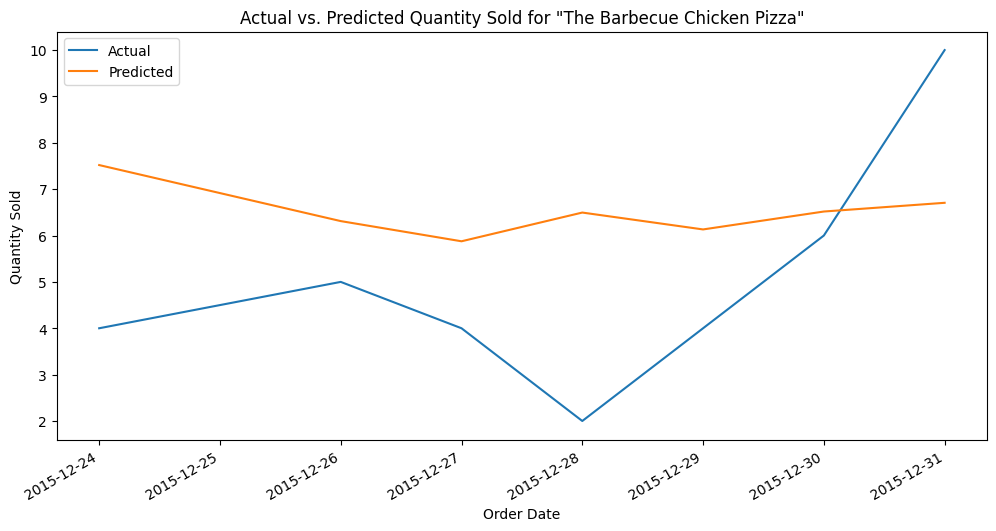

In [65]:
concatenated_sarima.plot(figsize=(12, 6))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold for "The Barbecue Chicken Pizza"')
plt.show()

# **Prophet**

In [ ]:
! pip install prophet

In [66]:
from prophet import Prophet

In [67]:
one_pizza_prophet = pd.DataFrame({'ds': one_pizza.index, 'y': one_pizza.values})

one_pizza_prophet.head()

,ds,y
0,2015-01-01,11.0
1,2015-01-02,12.0
2,2015-01-03,2.0
3,2015-01-04,2.0
4,2015-01-05,6.0


In [68]:
# one_pizza_prophet.set_index('ds', inplace=True)

# split train and test
pr_train = one_pizza_prophet[:-7]
pr_test = one_pizza_prophet[-7:]

In [69]:
# fit model prophet
pr_model = Prophet()
pr_model.fit(pr_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbk2gj2a7/m3v7cvoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbk2gj2a7/hzm2x7c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12685', 'data', 'file=/tmp/tmpbk2gj2a7/m3v7cvoa.json', 'init=/tmp/tmpbk2gj2a7/hzm2x7c8.json', 'output', 'file=/tmp/tmpbk2gj2a7/prophet_modelutksc582/prophet_model-20241023063223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
# forcast for one week
pr_future = pr_model.make_future_dataframe(periods=7, freq='D')
pr_forecast = pr_model.predict(pr_future)

In [71]:
# extract forecast values
pr_forecast_values = pr_forecast['yhat'][-len(pr_test):].values

In [72]:
# Evaluate the model
mae = mean_absolute_error(pr_test['y'], pr_forecast_values)
mse = mean_squared_error(pr_test['y'], pr_forecast_values)
rmse = np.sqrt(mse)

print(f'prophet MAE: {mae}')
print(f'prophet MSE: {mse}')
print(f'prophet RMSE: {rmse}')

prophet MAE: 2.649386800009464
prophet MSE: 8.228845649774026
prophet RMSE: 2.868596459904046


In [73]:
concat_prophet = pd.concat([pr_test, pr_forecast[['yhat']].iloc[-len(pr_test):]], axis=1)
concat_prophet.columns = ['date','Actual', 'Predicted']
concat_prophet.set_index('date', inplace=True)
concat_prophet

,Actual,Predicted
date,,
2015-12-24,4.0,7.179763
2015-12-26,5.0,7.675124
2015-12-27,4.0,6.737146
2015-12-28,2.0,5.499091
2015-12-29,4.0,6.180004
2015-12-30,6.0,6.305528
2015-12-31,10.0,6.030950


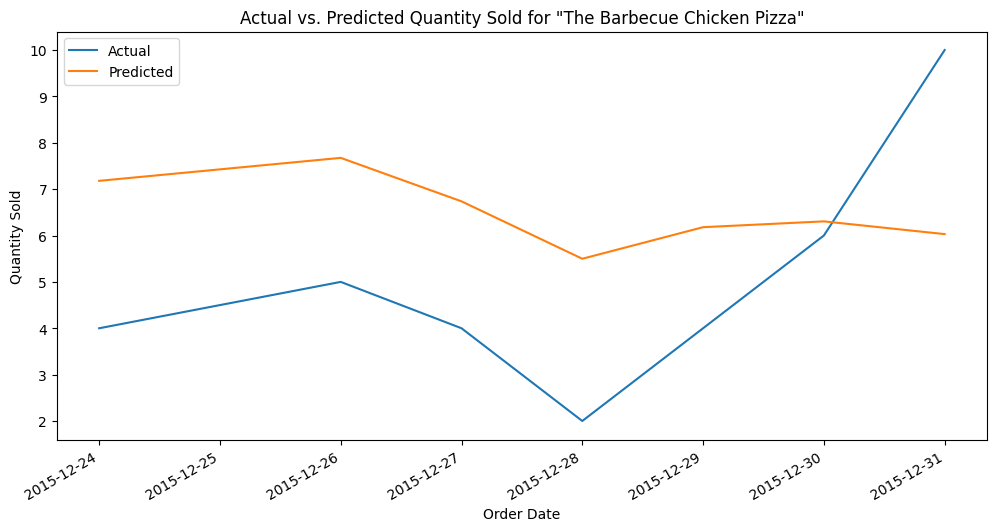

In [74]:
# visualize forecast
concat_prophet.plot(figsize=(12, 6))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold for "The Barbecue Chicken Pizza"')
plt.show()

# **Evaluation Metrics**

In [75]:
# Create a dictionary to store the evaluation metrics for each model
model_metrics = {
    'ARIMA': {'MAE': mae, 'MSE': mse, 'RMSE': rmse},
    'SARIMAX': {'MAE': mae, 'MSE': mse, 'RMSE': rmse},
    'Prophet': {'MAE': mae, 'MSE': mse, 'RMSE': rmse}
}

In [76]:
# Find the model with the lowest RMSE
best_model = min(model_metrics, key=lambda model: model_metrics[model]['RMSE'])

In [77]:
print(f"\nModel Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, RMSE={metrics['RMSE']:.2f}")

print(f"\nThe best performing model based on RMSE is: {best_model}")


Model Comparison:
ARIMA: MAE=2.65, MSE=8.23, RMSE=2.87
SARIMAX: MAE=2.65, MSE=8.23, RMSE=2.87
Prophet: MAE=2.65, MSE=8.23, RMSE=2.87

The best performing model based on RMSE is: ARIMA


## **Why ARIMA?**

  * **Accurate Predictions**:
    * ARIMA produced the best forecast for pizza sales, resulting in the most reliable purchase orders.

  * **Simple Yet Powerful**:
    * Though simpler than SARIMA and Prophet, ARIMA fit the pizza sales data very well without overfitting.

  * **Low Forecasting Error**:
    * MAE, MSE, and RMSE were lowest for the ARIMA model, making it the most reliable choice.

# **Purchase Order Generation**

In [78]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder

In [79]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
pizza_df.dropna(inplace=True)

In [81]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [82]:
pizza_df['order_date'] = pizza_df['order_date'].apply(parse_dates)

In [83]:
pizza_df = pizza_df[['order_date', 'pizza_name', 'quantity']]

In [84]:
pizza_df['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Calabrese Pizza', 'The Four Cheese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Napolitana Pizza', 'The Sicilian Pizza',
       'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Soppressata Pizza', 'The Brie Carre Pizza'

In [85]:
sales_summary = pizza_df.groupby(['order_date', 'pizza_name']).sum().reset_index()

In [86]:
sales_summary.head()

,order_date,pizza_name,quantity
0,2015-01-01,The Barbecue Chicken Pizza,11
1,2015-01-01,The Big Meat Pizza,5
2,2015-01-01,The Calabrese Pizza,1
3,2015-01-01,The California Chicken Pizza,4
4,2015-01-01,The Chicken Alfredo Pizza,2


In [87]:
# reshape data for time series modeling
sales_pivot = sales_summary.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)

In [88]:
arima_models = {}

for pizza_name in sales_pivot.columns:
  try:
    model = ARIMA(sales_pivot[pizza_name], order=(1, 1, 0))
    model_fit = model.fit()
    arima_models[pizza_name] = model_fit
  except:
    print(f'ARIMA model for {pizza_name} failed to fit')

## Ingredient Calculation

In [89]:
# Generate predictions for one week
prediction_days = 7
predictions_arima = {}

for pizza_name, model in arima_models.items():
  predictions_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + prediction_days - 1)

In [90]:
predictions_df = pd.DataFrame(predictions_arima)

In [91]:
predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=prediction_days, freq='D')

In [92]:
ingredients_df = ingred_df[['pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']]

In [93]:
# change column name to items_qty
ingredients_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)

In [94]:
predictions_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,8.177936,4.359358,0.888944,1.432509,7.0,2.416310,2.102540,7.119636,2.904758,7.036754,...,3.440253,2.287110,2.033516,5.917653,6.042423,3.472261,2.0,3.171529,3.0,7.835581
2016-01-01,9.007915,5.256593,1.506167,2.251518,7.0,3.252335,3.002629,8.502385,4.002268,8.000338,...,4.251190,3.759064,2.500562,5.496609,7.292032,4.250256,2.0,4.007356,3.0,8.772523
2016-01-02,8.629846,4.765913,1.163282,1.823589,7.0,2.811000,2.575658,7.838582,3.427381,7.527399,...,3.829571,2.960415,2.274866,5.689795,6.764059,3.854065,2.0,3.625284,3.0,8.366936
2016-01-03,8.802063,5.034256,1.353764,2.047181,7.0,3.043979,2.778198,8.157248,3.728513,7.759523,...,4.048777,3.393744,2.383932,5.601157,6.987133,4.055824,2.0,3.799936,3.0,8.542508
2016-01-04,8.723615,4.887505,1.247946,1.930355,7.0,2.920990,2.682120,8.004269,3.570777,7.645594,...,3.934809,3.158629,2.331226,5.641826,6.892882,3.953079,2.0,3.720099,3.0,8.466505
2016-01-05,8.759349,4.967760,1.306731,1.991396,7.0,2.985916,2.727696,8.077708,3.653400,7.701512,...,3.994063,3.286197,2.356696,5.623166,6.932704,4.005401,2.0,3.756594,3.0,8.499406
2016-01-06,8.743072,4.923870,1.274074,1.959502,7.0,2.951642,2.706076,8.042453,3.610121,7.674067,...,3.963256,3.216982,2.344388,5.631728,6.915879,3.978756,2.0,3.739912,3.0,8.485164


In [95]:
ingredients_df.head()

,pizza_name,pizza_ingredients,items_qty
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


In [96]:
# Create a dictionary to store the ingredient quantities
ingredient_quantities = {}

# Iterate through each pizza in the predictions
for pizza_name in predictions_df.columns:
  # Get the predicted quantity for the pizza
  predicted_quantity = predictions_df[pizza_name].sum()

  # Get the ingredients for the pizza
  pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]

  # Iterate through each ingredient for the pizza
  for index, row in pizza_ingredients.iterrows():
    ingredient = row['pizza_ingredients']
    ingredient_qty = row['items_qty']

    # Calculate the required quantity of the ingredient
    required_quantity = predicted_quantity * ingredient_qty

    # Add the required quantity to the dictionary
    if ingredient not in ingredient_quantities:
      ingredient_quantities[ingredient] = 0
    ingredient_quantities[ingredient] += required_quantity

In [97]:
# Create a DataFrame from the ingredient quantities
ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])

In [98]:
# Print the ingredient requirements
ingredient_requirements_df

,required_quantity
Barbecued Chicken,5475.941766
Red Peppers,11352.798791
Green Peppers,8098.953665
Tomatoes,34844.716601
Red Onions,54751.007524
...,...
Luganega Sausage,2647.457055
Onions,1323.728528
Soppressata Salami,4867.555670
Peperoncini verdi,1434.813346


## Purchase Order Creation

In [99]:
# Create a purchase order DataFrame
purchase_order_df = ingredient_requirements_df.copy()

# Add a column for the unit of measure (assuming all ingredients are in grams)
purchase_order_df['unit'] = 'grams'

# Rename the columns for better readability
purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})

# Add a header to the purchase order
print('Purchase Order:')
print('----------------')

# Print the purchase order table
print(purchase_order_df.to_string())

Purchase Order:
----------------
                                quantity   unit
Barbecued Chicken            5475.941766  grams
Red Peppers                 11352.798791  grams
Green Peppers                8098.953665  grams
Tomatoes                    34844.716601  grams
Red Onions                  54751.007524  grams
Barbecue Sauce               1825.313922  grams
Bacon                       20179.703908  grams
Pepperoni                   23923.636123  grams
Italian Sausage               341.952555  grams
Chorizo Sausage              1709.762775  grams
Brie Carre Cheese             262.227280  grams
Prosciutto                    262.227280  grams
Caramelized Onions                   NaN  grams
Pears                          87.409093  grams
Thyme                          43.704547  grams
Garlic                      17841.155611  grams
?duja Salami                 1612.325925  grams
Pancetta                     2418.488888  grams
Friggitello Peppers           403.081481  grams
Chicken

In [100]:
def calculate_ingredient_requirements(days):
  """Calculates ingredient requirements for a given number of days."""
  ingredient_quantities = {}

  for pizza_name in predictions_df.columns:
      predicted_quantity = predictions_df[pizza_name].sum() * days / 7  # Adjust for the desired number of days

      pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]

      for index, row in pizza_ingredients.iterrows():
        ingredient = row['pizza_ingredients']
        ingredient_qty = row['items_qty']
        required_quantity = predicted_quantity * ingredient_qty

        if ingredient not in ingredient_quantities:
          ingredient_quantities[ingredient] = 0
        ingredient_quantities[ingredient] += required_quantity

  return ingredient_quantities

In [101]:
# Calculate requirements for different durations
requirements_1day = calculate_ingredient_requirements(1)
requirements_2days = calculate_ingredient_requirements(2)
requirements_3days = calculate_ingredient_requirements(3)
requirements_5days = calculate_ingredient_requirements(5)
requirements_30days = calculate_ingredient_requirements(30)

# Create DataFrames for each duration
ingredient_requirements_1day_df = pd.DataFrame.from_dict(requirements_1day, orient='index', columns=['required_quantity'])
ingredient_requirements_2days_df = pd.DataFrame.from_dict(requirements_2days, orient='index', columns=['required_quantity'])
ingredient_requirements_3days_df = pd.DataFrame.from_dict(requirements_3days, orient='index', columns=['required_quantity'])
ingredient_requirements_5days_df = pd.DataFrame.from_dict(requirements_5days, orient='index', columns=['required_quantity'])
ingredient_requirements_30days_df = pd.DataFrame.from_dict(requirements_30days, orient='index', columns=['required_quantity'])

In [102]:
# Print or use the DataFrames as needed
print("Ingredient Requirements for 1 Day:")
print(ingredient_requirements_1day_df)

Ingredient Requirements for 1 Day:
                         required_quantity
Barbecued Chicken               782.277395
Red Peppers                    1621.828399
Green Peppers                  1156.993381
Tomatoes                       4977.816657
Red Onions                     7821.572503
...                                    ...
Luganega Sausage                378.208151
Onions                          189.104075
Soppressata Salami              695.365096
Peperoncini verdi               204.973335
Thai Sweet Chilli Sauce         180.000000

[64 rows x 1 columns]


In [103]:
# Create a function to generate a purchase order for a given number of days
def generate_purchase_order(days):
    prediction_days = days
    predictions_arima = {}


    for pizza_name, model in arima_models.items():
        predictions_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + prediction_days - 1)

    predictions_df = pd.DataFrame(predictions_arima)
    predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=prediction_days, freq='D')
          # Create a dictionary to store the ingredient quantities
    ingredient_quantities = {}
          # Iterate through each pizza in the predictions
    for pizza_name in predictions_df.columns:
        # Get the predicted quantity for the pizza
        predicted_quantity = predictions_df[pizza_name].sum()

        # Get the ingredients for the pizza
        pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]
         # Iterate through each ingredient for the pizza
        for index, row in pizza_ingredients.iterrows():
            ingredient = row['pizza_ingredients']
            ingredient_qty = row['items_qty']
        # Calculate the required quantity of the ingredient
            required_quantity = predicted_quantity * ingredient_qty

            # Add the required quantity to the dictionary
            if ingredient not in ingredient_quantities:
                ingredient_quantities[ingredient] = 0
            ingredient_quantities[ingredient] += required_quantity

              # Create a DataFrame from the ingredient quantities
    ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])

      # Create a purchase order DataFrame
    purchase_order_df = ingredient_requirements_df.copy()

      # Add a column for the unit of measure (assuming all ingredients are in grams)
    purchase_order_df['unit'] = 'grams'

      # Rename the columns for better readability
    purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})
    # Add a header to the purchase order
    print(f'Purchase Order for {days} days:') # days is now defined within the function's scope
    print('----------------')

    # Print the purchase order table
    print(purchase_order_df.to_string())

# Generate purchase orders for different durations
generate_purchase_order(1)


Purchase Order for 1 days:
----------------
                               quantity   unit
Barbecued Chicken            736.014229  grams
Red Peppers                 1495.985129  grams
Green Peppers               1069.617701  grams
Tomatoes                    4512.064381  grams
Red Onions                  7112.126608  grams
Barbecue Sauce               245.338076  grams
Bacon                       2576.205367  grams
Pepperoni                   3009.020436  grams
Italian Sausage               43.593581  grams
Chorizo Sausage              217.967904  grams
Brie Carre Cheese             26.668328  grams
Prosciutto                    26.668328  grams
Caramelized Onions                  NaN  grams
Pears                          8.889443  grams
Thyme                          4.444721  grams
Garlic                      2273.250801  grams
?duja Salami                 171.901129  grams
Pancetta                     257.851694  grams
Friggitello Peppers           42.975282  grams
Chicken         

In [104]:
print("\nIngredient Requirements for 2 Days:")
print(ingredient_requirements_2days_df)


Ingredient Requirements for 2 Days:
                         required_quantity
Barbecued Chicken              1564.554790
Red Peppers                    3243.656797
Green Peppers                  2313.986761
Tomatoes                       9955.633314
Red Onions                    15643.145007
...                                    ...
Luganega Sausage                756.416301
Onions                          378.208151
Soppressata Salami             1390.730191
Peperoncini verdi               409.946670
Thai Sweet Chilli Sauce         360.000000

[64 rows x 1 columns]


In [105]:
generate_purchase_order(2)


Purchase Order for 2 days:
----------------
                                quantity   unit
Barbecued Chicken            1546.726606  grams
Red Peppers                  3199.788152  grams
Green Peppers                2281.371471  grams
Tomatoes                     9798.390303  grams
Red Onions                  15401.386393  grams
Barbecue Sauce                515.575535  grams
Bacon                        5660.338446  grams
Pepperoni                    6693.460749  grams
Italian Sausage                96.159515  grams
Chorizo Sausage               480.797573  grams
Brie Carre Cheese              71.853328  grams
Prosciutto                     71.853328  grams
Caramelized Onions                   NaN  grams
Pears                          23.951109  grams
Thyme                          11.975555  grams
Garlic                       5004.088826  grams
?duja Salami                  442.083328  grams
Pancetta                      663.124993  grams
Friggitello Peppers           110.520832  gr

In [106]:
print("\nIngredient Requirements for 3 Days:")
print(ingredient_requirements_3days_df)


Ingredient Requirements for 3 Days:
                         required_quantity
Barbecued Chicken              2346.832186
Red Peppers                    4865.485196
Green Peppers                  3470.980142
Tomatoes                      14933.449972
Red Onions                    23464.717510
...                                    ...
Luganega Sausage               1134.624452
Onions                          567.312226
Soppressata Salami             2086.095287
Peperoncini verdi               614.920005
Thai Sweet Chilli Sauce         540.000000

[64 rows x 1 columns]


In [107]:
generate_purchase_order(3)


Purchase Order for 3 days:
----------------
                                quantity   unit
Barbecued Chicken            2323.412779  grams
Red Peppers                  4801.165009  grams
Green Peppers                3426.558618  grams
Tomatoes                    14694.489669  grams
Red Onions                  23101.059948  grams
Barbecue Sauce                774.470926  grams
Bacon                        8491.642408  grams
Pepperoni                   10044.281953  grams
Italian Sausage               143.818642  grams
Chorizo Sausage               719.093211  grams
Brie Carre Cheese             106.751801  grams
Prosciutto                    106.751801  grams
Caramelized Onions                   NaN  grams
Pears                          35.583934  grams
Thyme                          17.791967  grams
Garlic                       7504.965860  grams
?duja Salami                  660.913977  grams
Pancetta                      991.370965  grams
Friggitello Peppers           165.228494  gr

In [108]:
print("\nIngredient Requirements for 5 Days:")
print(ingredient_requirements_5days_df)



Ingredient Requirements for 5 Days:
                         required_quantity
Barbecued Chicken              3911.386976
Red Peppers                    8109.141994
Green Peppers                  5784.966903
Tomatoes                      24889.083286
Red Onions                    39107.862517
...                                    ...
Luganega Sausage               1891.040754
Onions                          945.520377
Soppressata Salami             3476.825478
Peperoncini verdi              1024.866675
Thai Sweet Chilli Sauce         900.000000

[64 rows x 1 columns]


In [109]:
generate_purchase_order(5)

Purchase Order for 5 days:
----------------
                                quantity   unit
Barbecued Chicken            3900.723825  grams
Red Peppers                  8080.148143  grams
Green Peppers                5764.798377  grams
Tomatoes                    24781.632054  grams
Red Onions                  38944.199751  grams
Barbecue Sauce               1300.241275  grams
Bacon                       14343.516006  grams
Pepperoni                   16994.328140  grams
Italian Sausage               243.036252  grams
Chorizo Sausage              1215.181261  grams
Brie Carre Cheese             184.803114  grams
Prosciutto                    184.803114  grams
Caramelized Onions                   NaN  grams
Pears                          61.601038  grams
Thyme                          30.800519  grams
Garlic                      12680.158819  grams
?duja Salami                 1138.218196  grams
Pancetta                     1707.327294  grams
Friggitello Peppers           284.554549  gr

In [110]:
print("\nIngredient Requirements for 30 Days:")
print(ingredient_requirements_30days_df)


Ingredient Requirements for 30 Days:
                         required_quantity
Barbecued Chicken             23468.321856
Red Peppers                   48654.851962
Green Peppers                 34709.801421
Tomatoes                     149334.499717
Red Onions                   234647.175101
...                                    ...
Luganega Sausage              11346.244522
Onions                         5673.122261
Soppressata Salami            20860.952870
Peperoncini verdi              6149.200053
Thai Sweet Chilli Sauce        5400.000000

[64 rows x 1 columns]


In [111]:
generate_purchase_order(30)

Purchase Order for 30 days:
----------------
                                 quantity   unit
Barbecued Chicken            23584.789346  grams
Red Peppers                  48964.883632  grams
Green Peppers                34928.395206  grams
Tomatoes                    150475.337630  grams
Red Onions                  236388.159574  grams
Barbecue Sauce                7861.596449  grams
Bacon                        87237.055964  grams
Pepperoni                   103534.796729  grams
Italian Sausage               1478.066392  grams
Chorizo Sausage               7390.331961  grams
Brie Carre Cheese             1149.510878  grams
Prosciutto                    1149.510878  grams
Caramelized Onions                    NaN  grams
Pears                          383.170293  grams
Thyme                          191.585146  grams
Garlic                       77137.247776  grams
?duja Salami                  7051.211533  grams
Pancetta                     10576.817299  grams
Friggitello Peppers     